# Map analysis

Analyse the maps of the different malls.

## Load dependencies

In [3]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
matplotlib.style.use('ggplot')

from IPython.display import Image

In [4]:
from msci.utils import utils
from msci.analysis.networks import *

## Import data

In [5]:
mauritius_df = utils.import_signals('Mall of Mauritius', version=3, signal_type=1)
phoenix_df = utils.import_signals('Phoenix Mall', version=3, signal_type=1)
home_df = utils.import_signals('Home & Leisure', version=3, signal_type=1)

### Mall of Mauritius

This is the largest of the three mall. It contains around 150 shops and recieves almost 700,000 people each month.

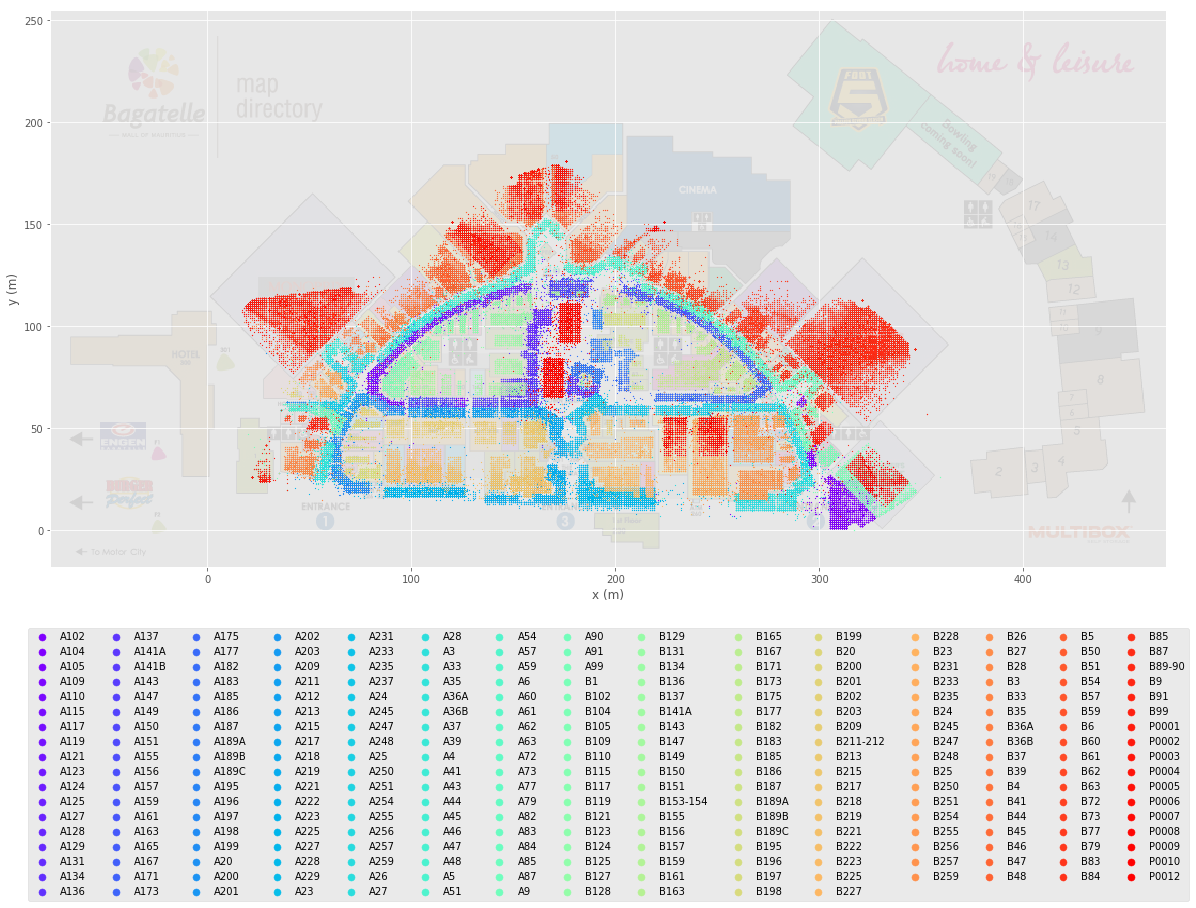

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 12))

img = mpimg.imread("../../images/mall_of_mauritius_map.png")
axes.imshow(img[::-1], origin='lower', extent=[-77,470,-18,255], alpha=0.1)

mauritius_store_group = mauritius_df[mauritius_df.store_id.notnull()].groupby('store_id')
colors = iter(cm.rainbow(np.linspace(0, 1, len(mauritius_store_group))))
for key, group in mauritius_store_group:
    axes.scatter(group['x'], group['y'], s=0.5, color=next(colors), label=key)
    
axes.set_xlabel('x (m)')
axes.set_ylabel('y (m)')
axes.legend(loc='upper center', markerscale=10., ncol=15, bbox_to_anchor=(0.5, -0.1));

The signals from devices in `Mall of Mauritius` which have a valid `store_id`. The signals in the dataframe have been labelled with a `store_id`. This id has been colour coded and shows that the `store_ids` starting with `A` are pathways and those starting with `B` are the stores. Each store has a pathway directly outside it where the `store_ids` have the same digits following the `A` or `B`. There are some `store_ids` which contain `nan`; these have been removed from this plot but are shown below.

There are 12 `store_ids` contain `P` shown at the end of the list in the figure above. These stores overlap with other stores which implies that they might be on another level. **This will require further investigation.**

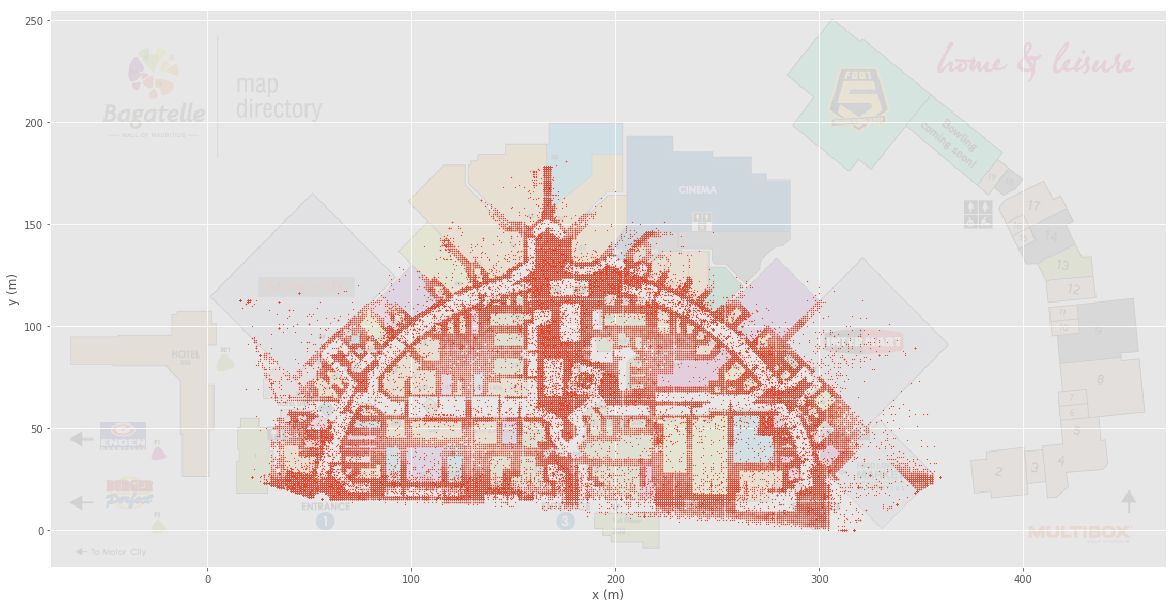

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 12))

img = mpimg.imread("../../images/mall_of_mauritius_map.png")
axes.imshow(img[::-1], origin='lower', extent=[-77,470,-18,255], alpha=0.1)

axes.scatter(
    mauritius_df[mauritius_df.store_id.isnull()]['x'], 
    mauritius_df[mauritius_df.store_id.isnull()]['y'], 
    s=0.5,
)
    
axes.set_xlabel('x (m)')
axes.set_ylabel('y (m)');

The signals from devices in `Mall of Mauritius` where `store_id` is `nan`. The `store_ids` that contain `nan` seem to be the wall of the mall. This is shown by the signals outlining each shop but are not wide enough to be hallways. There are some areas which might be empty space instead of shopping mall and areas such as the WC would be better being classified. **This will require further investigation**.

### Home & Leisure

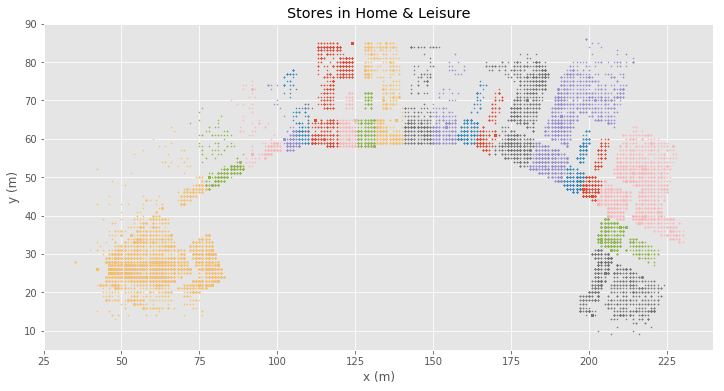

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

home_store_group = home_df[home_df.store_id.notnull()].groupby('store_id')
for key, group in home_store_group:
    axes.scatter(group['x'], group['y'], s=1)
    
axes.set_title('Stores in Home & Leisure')
axes.set_xlabel('x (m)')
axes.set_ylabel('y (m)');

### Phoenix Mall

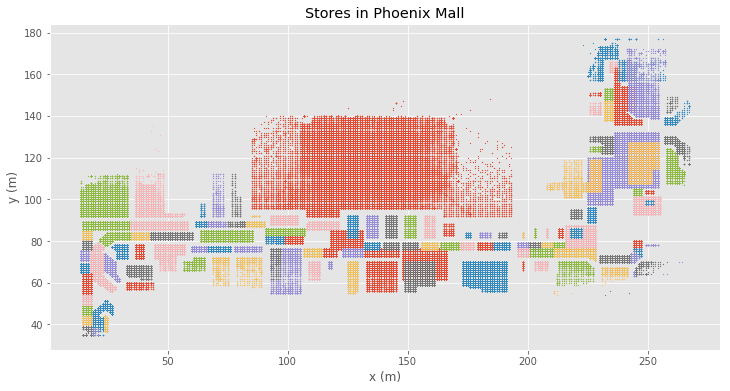

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

phoenix_store_group = phoenix_df[phoenix_df.store_id.notnull()].groupby('store_id')
for key, group in phoenix_store_group:
    axes.scatter(group['x'], group['y'], s=0.5)
    
axes.set_title('Stores in Phoenix Mall')
axes.set_xlabel('x (m)')
axes.set_ylabel('y (m)');